Chapter 30
# 多项式回归 + 岭回归正则化
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [7]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [8]:
# 生成随机数据
np.random.seed(0)
num = 30

In [15]:
X = np.random.uniform(0,4,num)
y = np.sin(0.4*np.pi * X) + 0.4 * np.random.randn(num)
data = np.column_stack([X,y])

In [17]:
x_array = np.linspace(0,4,101).reshape(-1,1)
degree = 8 # 多项式回归次数
# 将数据扩展为9列
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X.reshape(-1, 1))

$y = 0.179 -5.954x^1 + 20.028x^2 -18.641x^3 + 4.307x^4 + 2.691x^5 -1.838x^6 + 0.403x^7 -0.031x^8$
$y = 0.009 -3.715x^1 + 12.561x^2 -7.431x^3 -4.716x^4 + 6.846x^5 -2.935x^6 + 0.557x^7 -0.040x^8$
$y = -0.497 + 1.827x^1 + 1.341x^2 -1.551x^3 -1.260x^4 + 1.845x^5 -0.806x^6 + 0.155x^7 -0.011x^8$
$y = 0.070 + 0.634x^1 + 0.374x^2 + 0.014x^3 -0.202x^4 -0.120x^5 + 0.129x^6 -0.033x^7 + 0.003x^8$
$y = 0.474 + 0.142x^1 + 0.114x^2 + 0.052x^3 -0.011x^4 -0.040x^5 -0.008x^6 + 0.010x^7 -0.001x^8$
$y = 0.662 + 0.021x^1 + 0.021x^2 + 0.016x^3 + 0.005x^4 -0.009x^5 -0.017x^6 + 0.009x^7 -0.001x^8$


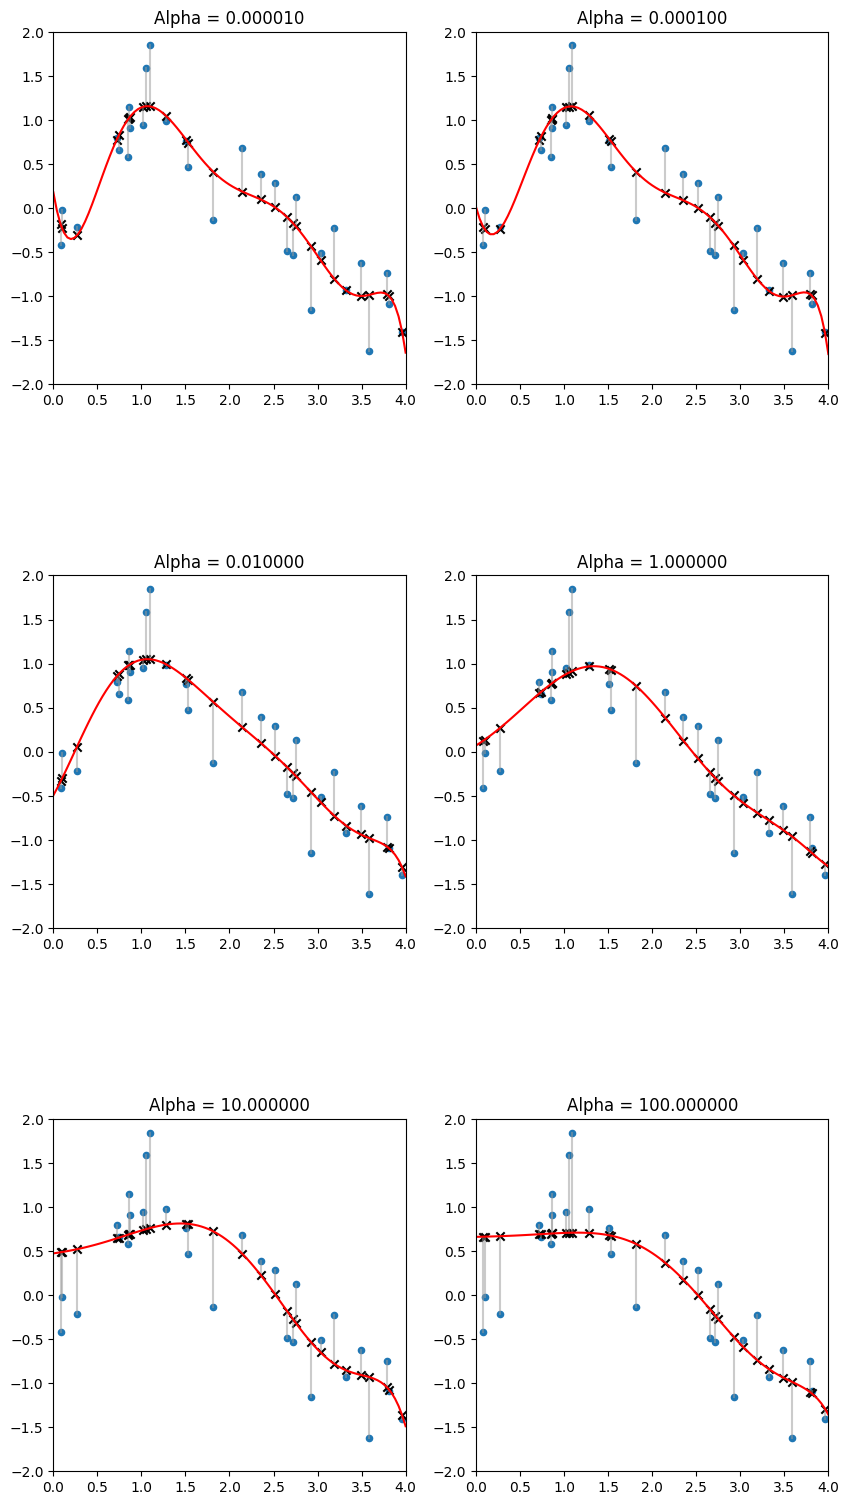

In [19]:
fig, axes = plt.subplots(3,2,figsize=(10,20))
axes = axes.flatten()
# 惩罚因子
alpha_array = [0.00001, 0.0001, 0.01, 1, 10, 100]

for ax, alpha_idx in zip(axes,alpha_array):
    # 训练岭回归模型
    ridge = Ridge(alpha=alpha_idx)
    ridge.fit(X_poly, y.reshape(-1,1))
    # 预测
    y_array_pred = ridge.predict(poly.fit_transform(x_array))    
    y_poly_pred  = ridge.predict(X_poly)
    data_ = np.column_stack([X,y_poly_pred])
    # 绘制散点图
    ax.scatter(X, y, s=20)
    ax.scatter(X, y_poly_pred, marker = 'x', color='k')
    # 绘制残差
    ax.plot(([i for (i,j) in data_], [i for (i,j) in data]), ([j for (i,j) in data_], [j for (i,j) in data]), c=[0.6,0.6,0.6], alpha=0.5)
    
    ax.plot(x_array, y_array_pred, color='r')
    ax.set_title('Alpha = %f' % alpha_idx)
    
    # 提取参数
    coef = ridge.coef_[0]
    # print(coef)
    intercept = ridge.intercept_[0]
    # print(intercept)
    # 回归解析式
    equation = '$y = {:.3f}'.format(intercept)
    for j in range(1, len(coef)):
        equation += ' + {:.3f}x^{}'.format(coef[j], j)
    equation += '$'
    equation = equation.replace("+ -", "-")
    print(equation)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(0,4); ax.set_ylim(-2,2); ax.grid(False)

In [24]:
# 多项式回归模型参数随惩罚因子α变化
alphas = np.logspace(4, -2, 100)
degrees = ['Degree = ' + str(d_i) for d_i in range(10)]
colors = plt.cm.jet(np.linspace(0,1,len(degrees)))

In [23]:
coef_s = []
for alpha_idx in alphas:
    ridge = Ridge(alpha=alpha_idx)
    ridge.fit(X_poly, y.reshape(-1,1))
    coef_s.append(ridge.coef_[0])
coef_s = np.array(coef_s)

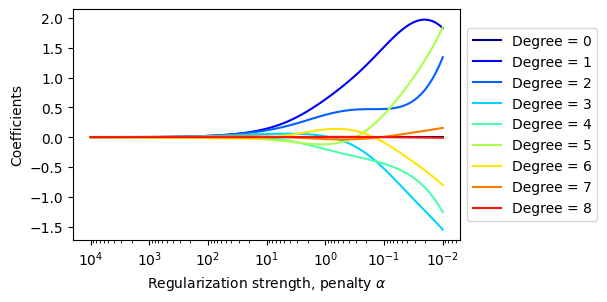

In [22]:
fig, ax = plt.subplots(figsize=(5,3))
for idx in range(9):
    ax.plot(alphas, coef_s[:, idx], color = colors[idx])
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1]) # 调转横轴
ax.set_xlabel(r"Regularization strength, penalty $\alpha$")
ax.set_ylabel("Coefficients")
ax.legend(degrees,loc='center left', bbox_to_anchor=(1, 0.5))